# Practical 2 - Credit Risk Classfication
In this practical we will be focusing on the data science part of ML:
1. sourcing the data
2. exploring the data
3. preparing the data.

> A central principle in machine learning is **Garbage in Garbage out**  
> Basicaly, your ML models can only be as good as your data.  
> So spending time to fix your data is worthy investment
## Imports

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from urllib.request import URLopener
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set()
sns.set_style("whitegrid")

## Defining the Problem
Your employer, an mysterious investment, wants you to build a model
that is able lendee has a good credit risk, so they can lend only 
to those that would be able to repay them.

This is a supervised learning problem because:
- there is some expected value that you are trying to predict

This is an classification problem as:
- you need to classify lendees as either 'good' or 'bad' in terms of credit risk

## Sourcing the Data
Now we proceed the sourcing the data:
- Finding and downloading available online
    - [Googles Datasets](https://toolbox.google.com/datasetsearch)
    - [Kaggle Datasets](https://www.kaggle.com/datasets)
    - [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets.php)
    - [Academic Torrents](http://academictorrents.com/)
    
Suppose you did the research, and settled credit risk dataset [here](https://www.openml.org/d/31)

Download the credit risk dataset as a CSV file:
> CSV stands for comma seperated values, which tell us that the data is seperated by commas

In [2]:
URLopener().retrieve("https://www.openml.org/data/get_csv/31/dataset_31_credit-g.arff",
                     filename="credit_risk.csv")

('credit_risk.csv', <http.client.HTTPMessage at 0x7fdf0087f668>)

`pandas` makes loading CSVs very easy:

In [3]:
credit_df = pd.read_csv("credit_risk.csv")

> Now the data is in a a Pandas Dataframe called `credit_df`  
> You can think of Dataframes as structured collections of data.

## Exploring the Data
We now explore the to gain intutions on the data, while  
keeping an eye out for potential problems with the dataset.

Take at a look of the first 5 rows of the data:

In [4]:
credit_df.head().T

,0,1,2,3,4
checking_status,'<0','0<=X<200','no checking','<0','<0'
duration,6,48,12,42,24
credit_history,'critical/other existing credit','existing paid','critical/other existing credit','existing paid','delayed previously'
purpose,radio/tv,radio/tv,education,furniture/equipment,'new car'
credit_amount,1169,5951,2096,7882,4870
savings_status,'no known savings','<100','<100','<100','<100'
employment,'>=7','1<=X<4','4<=X<7','4<=X<7','1<=X<4'
installment_commitment,4,2,2,2,3
personal_status,'male single','female div/dep/mar','male single','male single','male single'
other_parties,none,none,none,guarantor,none


#### Categorical & Numerical Features

We can also observe the data is also mix bag of categorical and 
numeric features:
- categorical features include: `saving_status`, `class`, `job`
- numeric features include: `duration`, `age`, `num_dependents`

> categorical features require further processing before ML can done on it

Lets take a look at the datatypes in this dataset:

In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_status           1000 non-null object
duration                  1000 non-null int64
credit_history            1000 non-null object
purpose                   1000 non-null object
credit_amount             1000 non-null int64
savings_status            1000 non-null object
employment                1000 non-null object
installment_commitment    1000 non-null int64
personal_status           1000 non-null object
other_parties             1000 non-null object
residence_since           1000 non-null int64
property_magnitude        1000 non-null object
age                       1000 non-null int64
other_payment_plans       1000 non-null object
housing                   1000 non-null object
existing_credits          1000 non-null int64
job                       1000 non-null object
num_dependents            1000 non-null int64
own_telephone             1000 non-null object
foreign_

Observe that the datatype for all the categorical variables are `object`

# Statstical Analysis of Data
We can task Pandas to produce to produce a statisical summary (ie min, max, mean) of the numerical features in the data:

In [6]:
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_commitment,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
num_dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


From the stastical summary, we can observe the following:
- the features have different ranges (min & max values)
- the features have different means and standard deviations ( `dev` )

> We have to do feature normalisation on the numeric features  
> as some ML algorihms are sensitive to feature scale.

#### Class Imbalance
Lets visualise the distribution of our target output: credit risk `class` by  
plotting the counts of each credit risk class (also know as histogram):

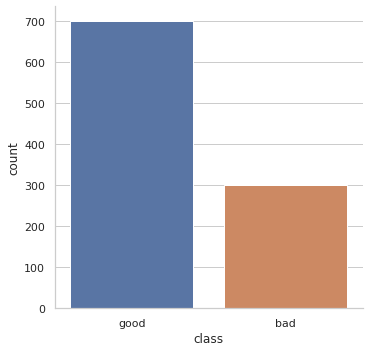

In [7]:
sns.catplot(kind="count", x="class", data=credit_df)

From the dataset, that the class/label imbalance problem.  
This happens in classification problems, when the distribution  
of the output class/label is not balanced (relatively equal)

This means the following:
- accuracy is no longer a good metric for evaluating models trained using this data (reasons detailed later)
- we will want to solve this problem, because it may affect the models train may not perform that well.
- it may also affect visualisations that we may create later

To solve this problem we can either:
- undersample the larger class such to match the smaller classes size.
- oversample the smaller to match the larger classes size
- other more fancy algorithmic methods that we are not going to cover. (ie SMOTE)

Since we have relatively little data to begin with, we are going to try oversampling:

/home/zzy/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


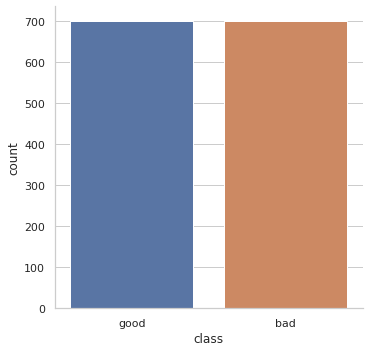

In [8]:
# compute class imbalance gap
n_imbalance = (np.sum((credit_df["class"] == "good").to_numpy()) -
               np.sum((credit_df["class"] == "bad").to_numpy()))

# obtain index of the exmaples with the class 'bad':
bad_indexes = np.argwhere((credit_df["class"] == "bad")).reshape((-1,))

# resample no. of imbalance bad indexes to add to dataframe for oversampling
add_indexes = np.random.choice(bad_indexes, size=(n_imbalance,))

# add oversampled instances
oversample_df = credit_df.iloc[add_indexes, :]
credit_df =  credit_df.append(oversample_df)

# plot to show that the class imbalance problem is now fixed
sns.catplot(kind="count", x="class", data=credit_df)

### Visualising the data
Visualising the data is instrumental to obtaining intutions of how the data  
works. Since this is ML course, we wont go into too much detail:

Lets visualise the distribution of the features in the dataset:

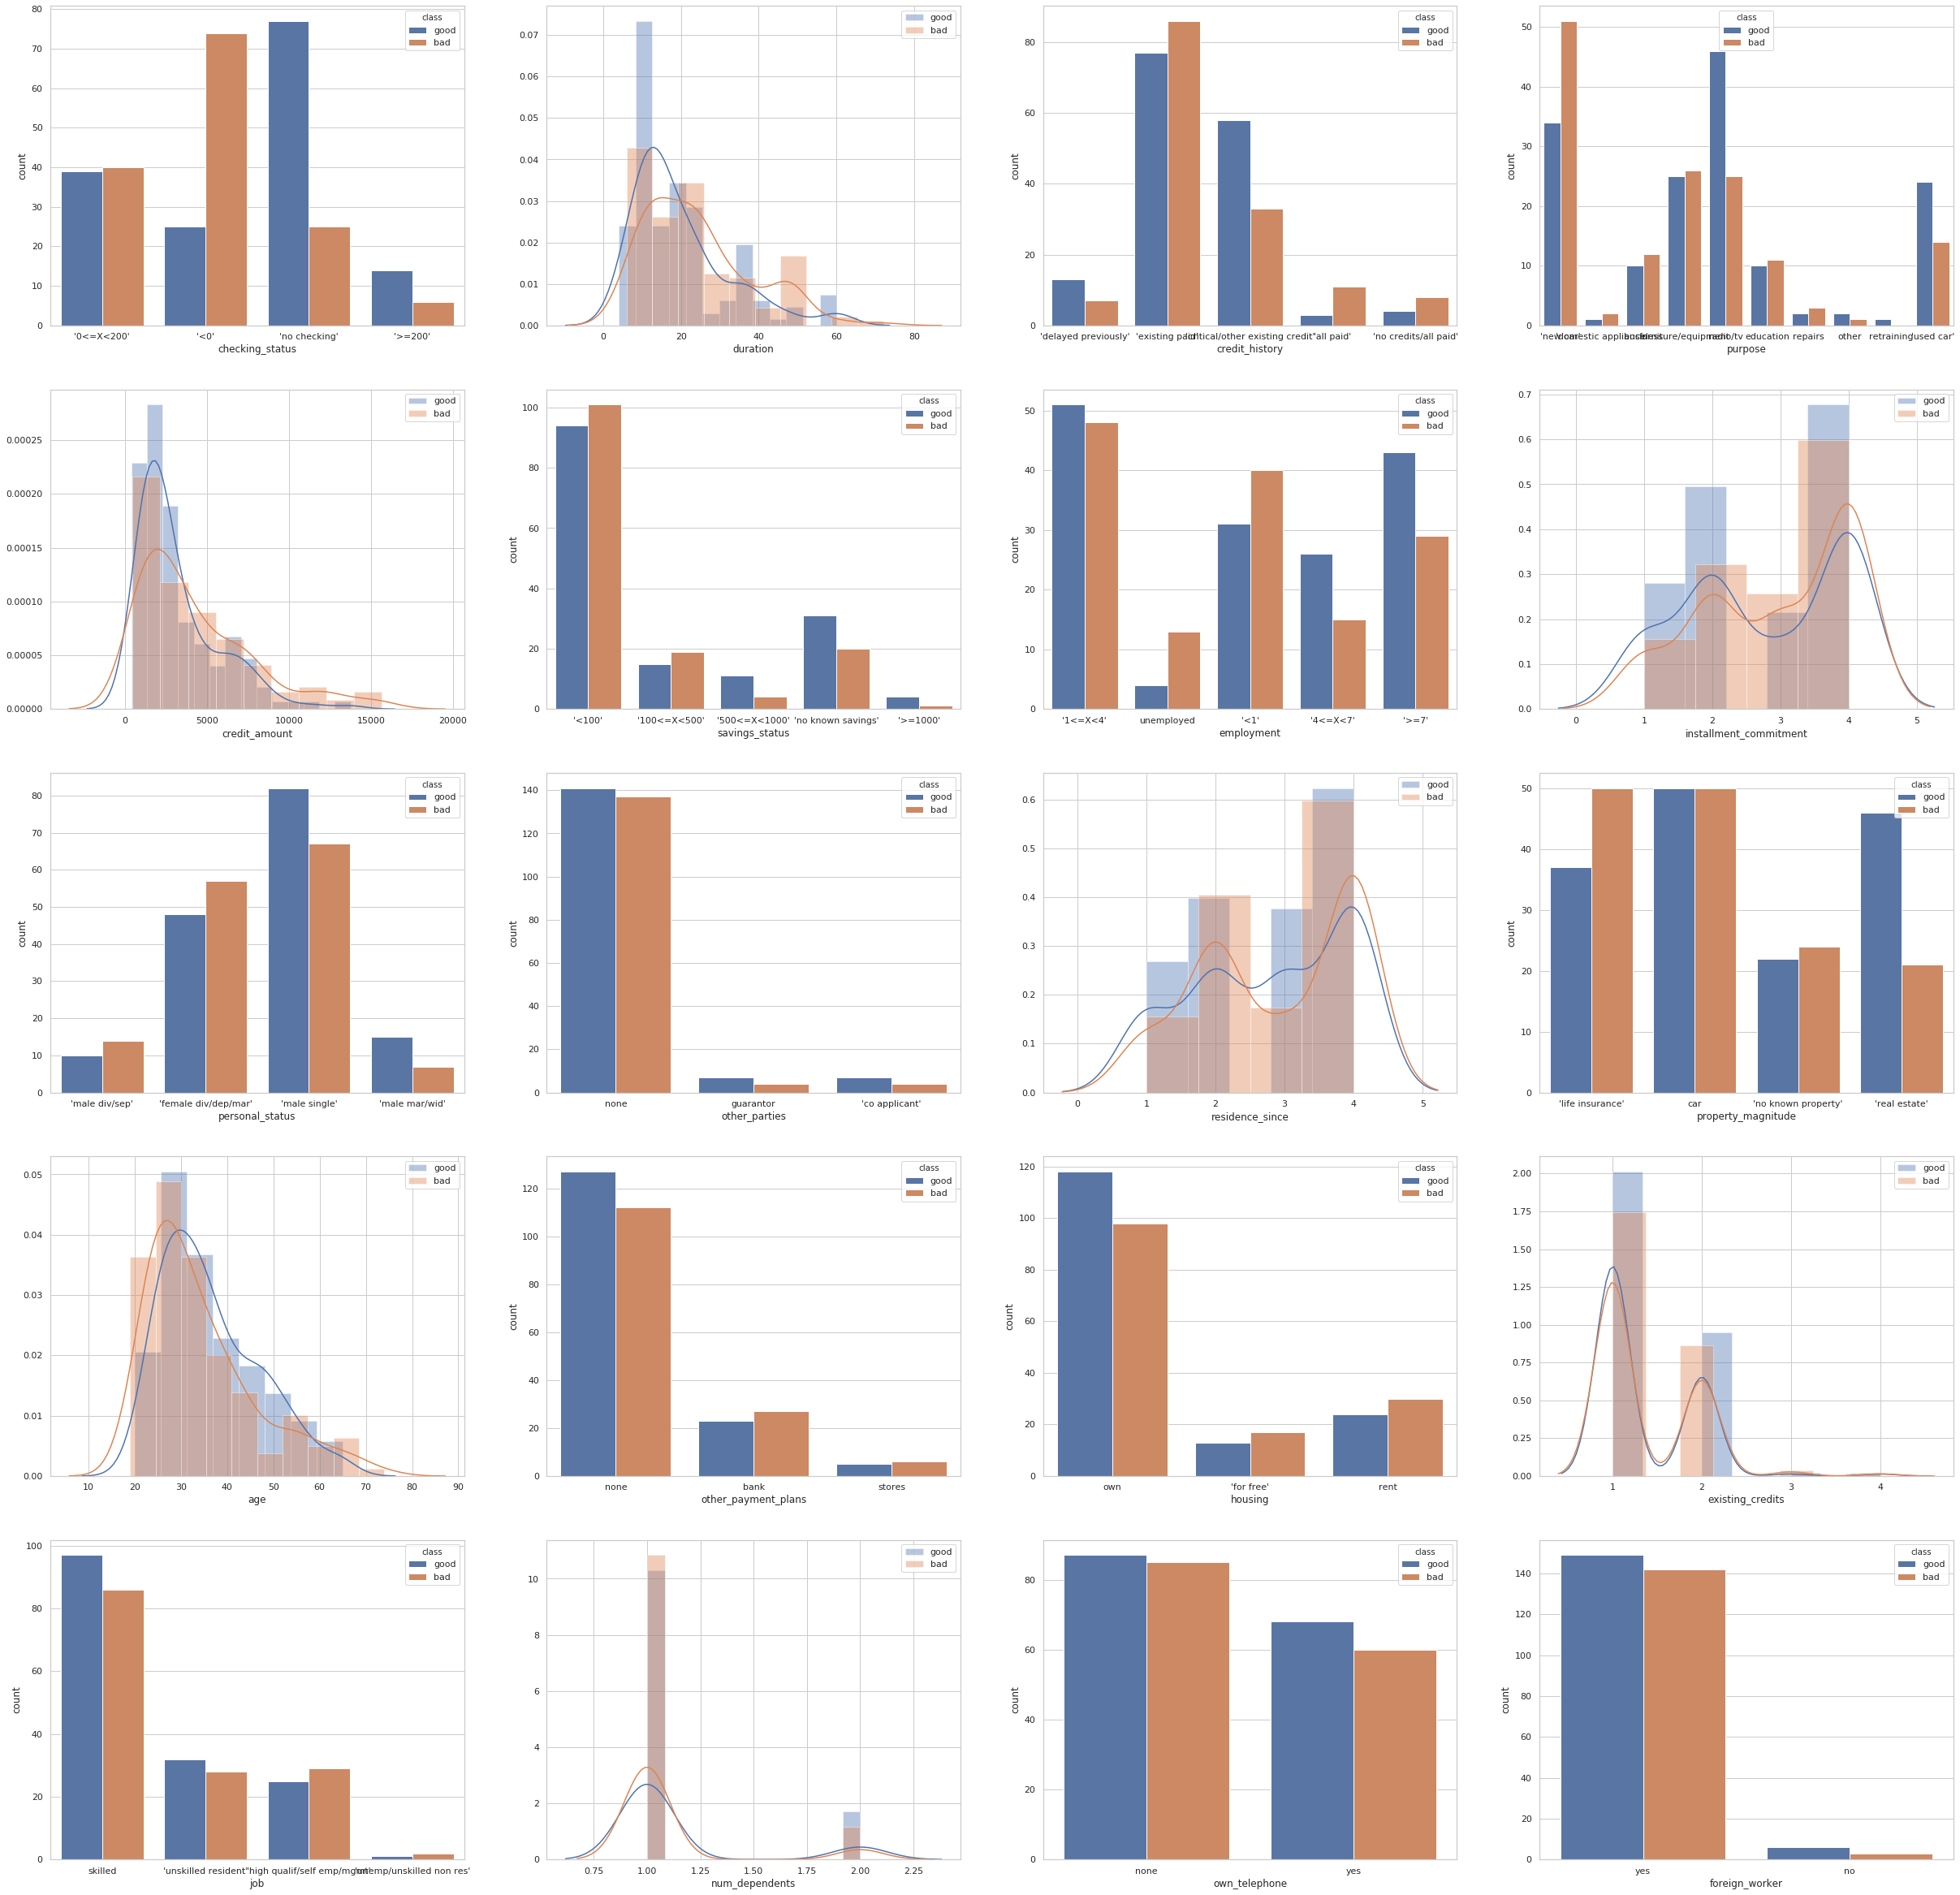

In [9]:
# Plot using sample to speed things up
plot_df = credit_df.sample(300)

# Plots of each feature in a 5 by 4 grid
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(42,42))
for feature, ax in zip(credit_df.columns, axs.flatten()):
    # skip the credit rating feature
    if feature == "class": continue
    
    # plot categorical features as a bar graph
    if str(plot_df[feature].dtype) == "object":
        sns.countplot(x=feature, data=plot_df, ax=ax, hue="class")
    # plot numeric features as a histogram with kernel density
    else:
        sns.distplot(a=plot_df[plot_df['class'] == "good"][feature], ax=ax, label="good")
        sns.distplot(a=plot_df[plot_df['class'] == "bad"][feature], ax=ax, label="bad")
        ax.legend()

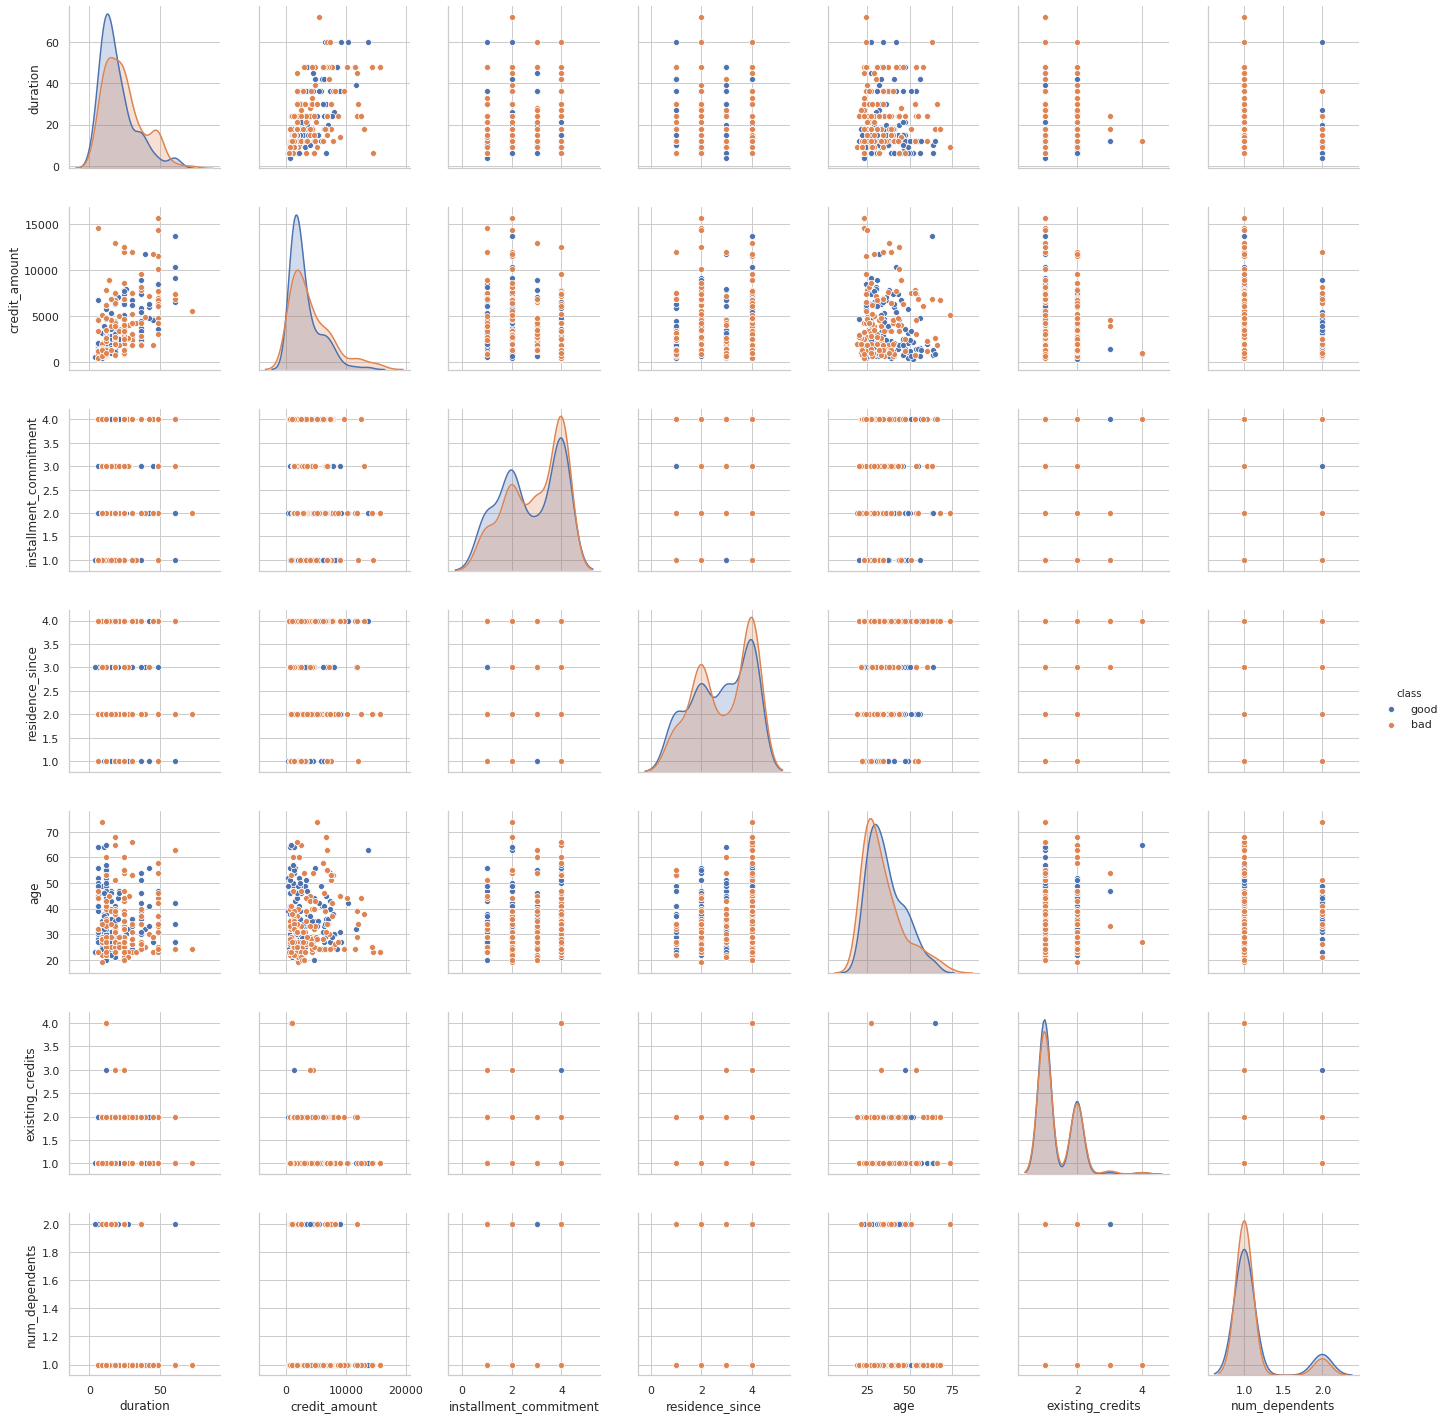

In [10]:
# plot the numeric features against each other to look for coreelations.
g = sns.pairplot(plot_df, hue="class")
g.fig.set_size_inches(20, 20)

What relationships can you gleam from the data visualisation?
- The lesser the amount lent (`credit_amount`) the more likely the credit risk is `good`
- Having no checking account or more than 200 in your checking account `checking_status` means that you are likey to have a `good` credit rating.
- ...


## Preparing the Data
Once we have explored the data and known its quirks, its time to prepare the data  
for machine learning by applying a set of transformations.

### Encoding Categorical Features
ML models only accept numeric features as input. Thus we must convert all the categoorical  
features into numeric features by doing the following:
- converting the categorical variables into into category integers
- one hot encode the integers to produce a one hot encoding

Converting the categories into category ints with pandas:

In [11]:
# find names of categorical features
categoricals = [ feat for feat in credit_df.columns  if str(credit_df[feat].dtype) == "object"]
# tell pandas which features are categoical
for feature in categoricals:
    credit_df[feature] =  credit_df[feature].astype("category")
        
# create a copy of the dataframe to write preprocessed features into
pp_credit_df = credit_df.copy()

# convert categories into into integers
for feature in categoricals:
    pp_credit_df[feature] = pp_credit_df[feature].cat.codes

We still have to one hot encode the category integers:
ie for `class`:` 1 -> [0, 1]` and `0 -> [1, 0]`

> This is done to ensure that the model does not think that thet one category  
> is larger than another. `good`,represented by 1, should not be considered  
> numerically greater than `bad`, represented by 0

Getting a one hot encoding is very simple with `.get_dummies()`:

In [12]:
categoricals = [ feat for feat in credit_df.columns  if str(credit_df[feat].dtype) == "category"]
pp_credit_df = pd.get_dummies(data=pp_credit_df, columns=categoricals)

### Inputs and Outputs
Its time to split apart the inputs and the dataset. As we observedm earlier  
the output is the credit risk `class`, the input would be everything else

In [13]:
risk_class = credit_df['class']
lendee_features = pp_credit_df.loc[:, :'foreign_worker_1']

### Feature Normalisation
Some ML models are senstive to the scale of input features:
- the larger feature may appear more important to some models
- some models (ie neural networks) will take longer to fit data

One way to do feature normalisation is to apply:
$$
x_{norm} = \frac{x - \mu}{\sigma}
$$
where $x$ is a feature, $\mu$ is the mean, $\sigma$ is the standard deviation.

Thankfully scikit-learn provides `StandardScaler`:

In [14]:
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(lendee_features)
landee_features = scaler.transform(lendee_features)

### Training/Evaluating the model
The data science part is now complete.
Training a model on the prepared data is left as an exercise to  
the reader.